#1. Preprocessing & EDA [0.5]
a. Use the preprocessed dataset and insights from your previous assignments. Ensure that all necessary preprocessing steps (handling missing values, encoding categorical variables, normalizing/scaling numerical features, and feature engineering) are applied.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [34]:
df = pd.read_csv('data.csv')
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [36]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               11914 non-null  string
 1   Model              11914 non-null  string
 2   Year               11914 non-null  Int64 
 3   Engine Fuel Type   11911 non-null  string
 4   Engine HP          11845 non-null  Int64 
 5   Engine Cylinders   11884 non-null  Int64 
 6   Transmission Type  11914 non-null  string
 7   Driven_Wheels      11914 non-null  string
 8   Number of Doors    11908 non-null  Int64 
 9   Market Category    8172 non-null   string
 10  Vehicle Size       11914 non-null  string
 11  Vehicle Style      11914 non-null  string
 12  highway MPG        11914 non-null  Int64 
 13  city mpg           11914 non-null  Int64 
 14  Popularity         11914 non-null  Int64 
 15  MSRP               11914 non-null  Int64 
dtypes: Int64(8), string(8)
memory usage: 1.5

In [37]:
df.duplicated().sum() #handling duplicated values

715

In [38]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [39]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11199.0,11130.0,11169.0,11193.0,11199.0,11199.0,11199.0,11199.0
mean,2010.714528,253.388859,5.66595,3.454123,26.61059,19.731851,1558.483347,41925.927136
std,7.228211,110.150938,1.797021,0.872946,8.977641,9.177555,1445.668872,61535.047817
min,1990.0,55.0,0.0,2.0,12.0,7.0,2.0,2000.0
25%,2007.0,172.0,4.0,2.0,22.0,16.0,549.0,21599.5
50%,2015.0,239.0,6.0,4.0,25.0,18.0,1385.0,30675.0
75%,2016.0,303.0,6.0,4.0,30.0,22.0,2009.0,43032.5
max,2017.0,1001.0,16.0,4.0,354.0,137.0,5657.0,2065902.0


In [40]:
df.describe(exclude=['number']) #For categorical features

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,11199,11199,11196,11199,11199,7823,11199,11199
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1083,156,6658,7932,4354,1075,4395,2843


In [41]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [42]:
df.drop('Market Category', axis=1, inplace=True)

In [43]:
# replace missing values with mean for continuous features
df['Engine HP'] = df['Engine HP'].fillna(df['Engine HP'].median())
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(df['Engine Cylinders'].median())

# replace missing values with most frequent for categorical features
df['Number of Doors'] = df['Number of Doors'].fillna(df['Number of Doors'].mode()[0])
df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0])

df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [44]:
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [45]:
#handling outliers
Q1 = df['highway MPG'].quantile(0.25)
Q3 = df['highway MPG'].quantile(0.75)

IQR = Q3-Q1
outliers_df = df[(df['highway MPG'] < (Q1 - 1.5 * IQR)) | (df['highway MPG'] > (Q3 + 1.5 * IQR))]
df.drop(outliers_df.index, inplace=True) #eliminating outliers

In [46]:
Q1 = df['city mpg'].quantile(0.25)
Q3 = df['city mpg'].quantile(0.75)

IQR = Q3-Q1
outliers_df = df[(df['city mpg'] < (Q1 - 1.5 * IQR)) | (df['city mpg'] > (Q3 + 1.5 * IQR))]
df.drop(outliers_df.index, inplace=True) #eliminating outliers

In [47]:
Q1 = df['Engine HP'].quantile(0.25)
Q3 = df['Engine HP'].quantile(0.75)

IQR = Q3-Q1
outliers_df = df[(df['Engine HP'] < (Q1 - 1.5 * IQR)) | (df['Engine HP'] > (Q3 + 1.5 * IQR))]
df.drop(outliers_df.index, inplace=True) #eliminating outliers

In [48]:
Q1 = df['Popularity'].quantile(0.25)
Q3 = df['Popularity'].quantile(0.75)

IQR = Q3-Q1
outliers_df = df[(df['Popularity'] < (Q1 - 1.5 * IQR)) | (df['Popularity'] > (Q3 + 1.5 * IQR))]
df.drop(outliers_df.index, inplace=True) #eliminating outliers

In [49]:
Q1 = df['MSRP'].quantile(0.25)
Q3 = df['MSRP'].quantile(0.75)

IQR = Q3-Q1
outliers_df = df[(df['MSRP'] < (Q1 - 1.5 * IQR)) | (df['MSRP'] > (Q3 + 1.5 * IQR))]
df.drop(outliers_df.index, inplace=True) #eliminating outliers

In [50]:
category_counts = df['Model'].value_counts()

threshold = 0.001 * len(df)
outliers = category_counts[category_counts < threshold].index

df = df[~df['Model'].isin(outliers)] #eliminating outliers for categorical features

In [51]:
category_counts = df['Engine Fuel Type'].value_counts()

threshold = 0.01 * len(df)
outliers = category_counts[category_counts < threshold].index

df = df[~df['Engine Fuel Type'].isin(outliers)] #eliminating outliers for categorical features

In [52]:
category_counts = df['Year'].value_counts()

threshold = 0.01 * len(df)
outliers = category_counts[category_counts < threshold].index

df = df[~df['Year'].isin(outliers)] #eliminating outliers for categorical features

In [53]:
category_counts = df['Make'].value_counts()

threshold = 0.01 * len(df)
outliers = category_counts[category_counts < threshold].index

df = df[~df['Make'].isin(outliers)]


In [54]:
category_counts = df['Engine Cylinders'].value_counts()

threshold = 0.01 * len(df)
outliers = category_counts[category_counts < threshold].index

df = df[~df['Engine Cylinders'].isin(outliers)]

In [55]:
category_counts = df['Transmission Type'].value_counts()

threshold = 0.01 * len(df)
outliers = category_counts[category_counts < threshold].index
df = df[~df['Transmission Type'].isin(outliers)]

In [56]:
category_counts = df['Vehicle Style'].value_counts()

threshold = 0.01 * len(df)
outliers = category_counts[category_counts < threshold].index

df = df[~df['Vehicle Style'].isin(outliers)]

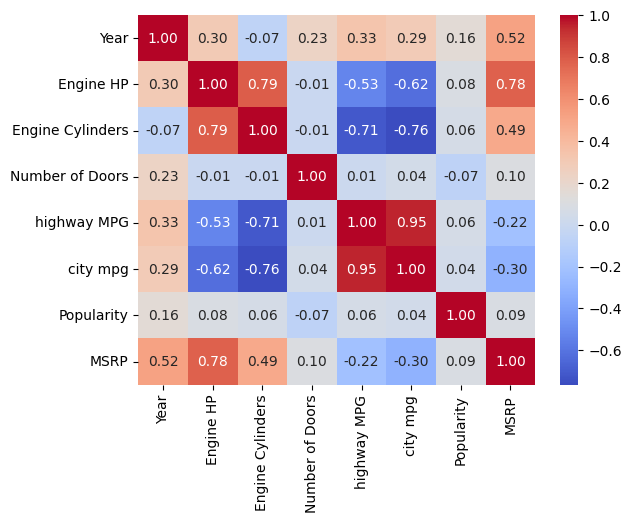

In [57]:
#Correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['number']).columns

correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


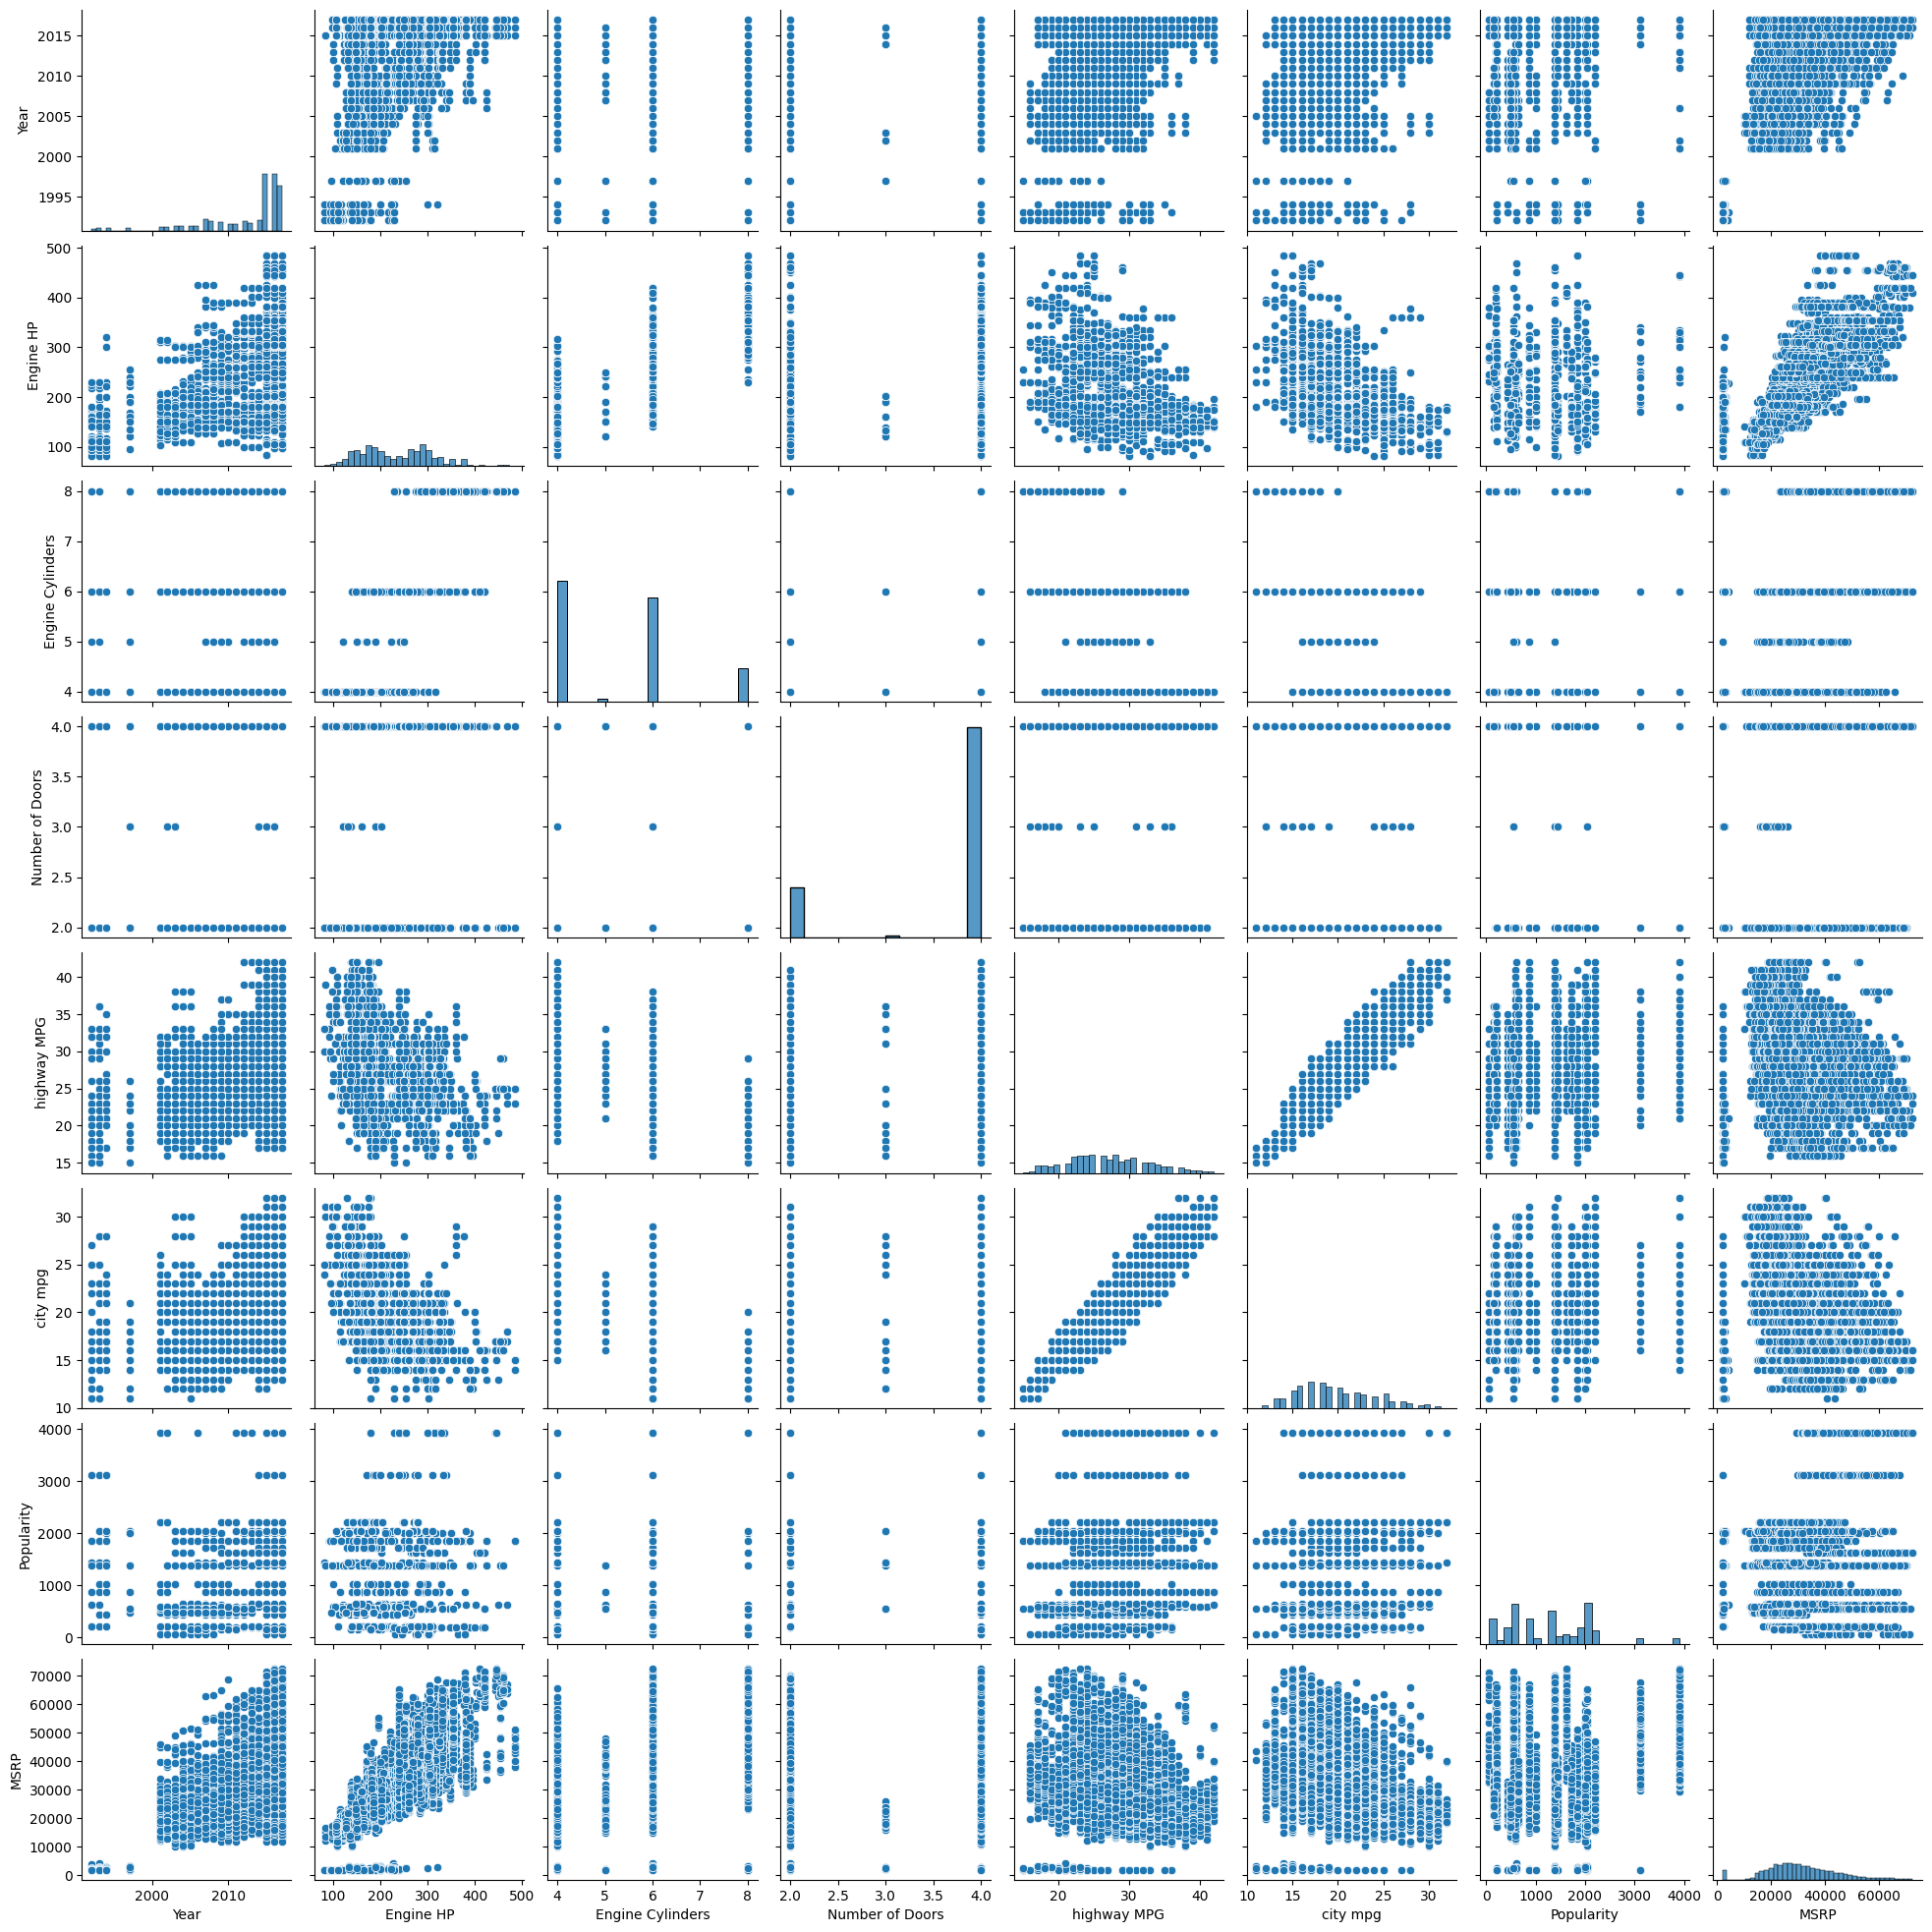

In [58]:
#Pair plots
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[['Make', 'Model', 'Engine Fuel Type','Engine Cylinders', 'Transmission Type', 'Driven_Wheels','Number of Doors', 'Vehicle Size', 'Vehicle Style']] = df[['Make', 'Model', 'Engine Fuel Type','Engine Cylinders', 'Transmission Type', 'Driven_Wheels','Number of Doors', 'Vehicle Size', 'Vehicle Style']].apply(le.fit_transform)

In [60]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [61]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1,2,0,2011,3,300,2,2,3,0,0,3,28,19,3916,40650
2,2,0,2011,3,300,2,2,3,0,0,4,28,20,3916,36350
3,2,0,2011,3,230,2,2,3,0,0,4,28,18,3916,29450
4,2,0,2011,3,230,2,2,3,0,0,3,28,18,3916,34500
5,2,0,2012,3,230,2,2,3,0,0,4,28,18,3916,31200


In [62]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11876,8,292,2017,1,355,3,1,3,2,1,2,23,16,549,57315
11877,8,292,2017,1,355,3,1,1,2,1,2,22,16,549,51530
11878,8,292,2017,2,420,3,1,3,2,1,2,22,15,549,65965
11879,8,292,2017,1,355,3,1,1,2,1,2,22,16,549,60315
11880,8,292,2017,1,355,3,1,3,2,1,2,23,16,549,48530


In [63]:
#remove all columns other than Make, model, year, engine fuel type, engine Hp and transmission type
df = df[['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Transmission Type', 'MSRP', 'Engine Cylinders']]
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Transmission Type,MSRP,Engine Cylinders
1,2,0,2011,3,300,2,40650,2
2,2,0,2011,3,300,2,36350,2
3,2,0,2011,3,230,2,29450,2
4,2,0,2011,3,230,2,34500,2
5,2,0,2012,3,230,2,31200,2


In [64]:
# normalize numerical features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_features = ['Engine HP'] #continuous value and others are treated as categorical values
df[numeric_features] = scaler.fit_transform(df[numeric_features])

df.head() #normalized dataset

,Make,Model,Year,Engine Fuel Type,Engine HP,Transmission Type,MSRP,Engine Cylinders
1,2,0,2011,3,0.542079,2,40650,2
2,2,0,2011,3,0.542079,2,36350,2
3,2,0,2011,3,0.368812,2,29450,2
4,2,0,2011,3,0.368812,2,34500,2
5,2,0,2012,3,0.368812,2,31200,2


The dataset is preprocessed by handling missing values, encoding categorical variables using label encoding, normalizing continuous features, eliminating duplicates and outliers.

# 2. Feature Selection and Dimensionality Reduction [1]
a. Select relevant features for model training and justify your selection process.

b. Apply dimensionality reduction techniques. Besides PCA, explore methods like t-SNE or LDA, depending on whether the primary goal is to preserve class separability (LDA) or data structure in a non-linear manner (t-SNE). Discuss the results and suitability of each method for the dataset.

In [71]:
# binning msrp
import pandas as pd
df['MSRP_bin'] = pd.cut(df['MSRP'], bins=5, labels=False)
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Transmission Type,MSRP,Engine Cylinders,MSRP_bin
1,2,0,2011,3,0.542079,2,40650,2,2
2,2,0,2011,3,0.542079,2,36350,2,2
3,2,0,2011,3,0.368812,2,29450,2,1
4,2,0,2011,3,0.368812,2,34500,2,2
5,2,0,2012,3,0.368812,2,31200,2,2


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 1 to 11880
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               6463 non-null   int64  
 1   Model              6463 non-null   int64  
 2   Year               6463 non-null   Int64  
 3   Engine Fuel Type   6463 non-null   int64  
 4   Engine HP          6463 non-null   float64
 5   Transmission Type  6463 non-null   int64  
 6   MSRP               6463 non-null   Int64  
 7   Engine Cylinders   6463 non-null   int64  
 8   MSRP_bin           6463 non-null   int64  
dtypes: Int64(2), float64(1), int64(6)
memory usage: 517.5 KB


In [73]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Transmission Type', 'MSRP', 'Engine Cylinders', 'MSRP_bin'],
      dtype='object')

- In the preprocessing stage, the features namely, 'Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Transmission Type', 'Engine Cylinders'are chosen for model training features with the target feature as 'MSRP_bin'
- Observing the heatmap and pairplots, their is high correlation between the selected features and MSRP.

In [74]:
# Dimensionality Reduction using pca, t-sne, lda
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# pca
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

# t-SNE
tsne = TSNE(n_components=3, learning_rate='auto',
          init='random', perplexity=3)
df_tsne = tsne.fit_transform(df)

# lda
lda = LinearDiscriminantAnalysis(n_components=3)
df_lda = lda.fit_transform(df, df['MSRP_bin'])

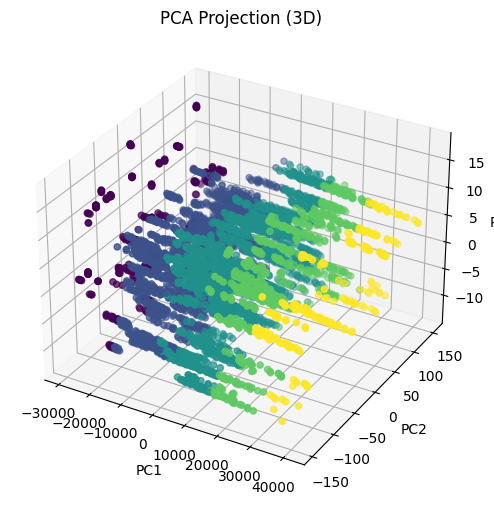

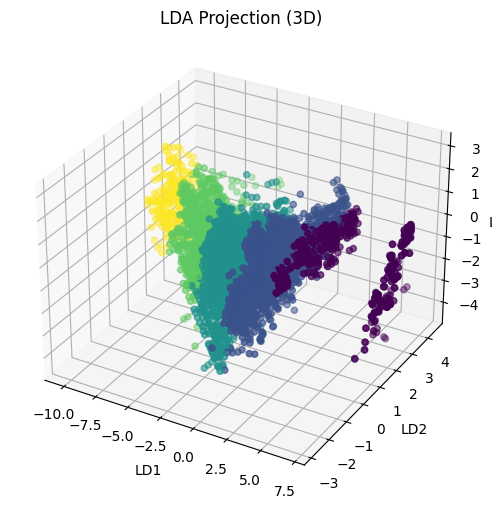

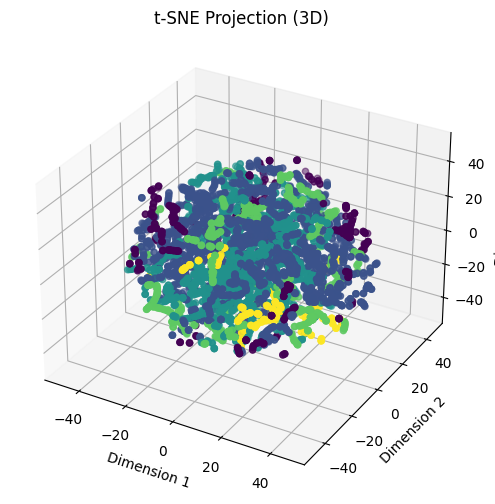

In [75]:
# plot the results in 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# for pca
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=df['MSRP_bin'], cmap='viridis')
ax.set_title('PCA Projection (3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

# for lda
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_lda[:, 0], df_lda[:, 1], df_lda[:, 2], c=df['MSRP_bin'], cmap='viridis')
ax.set_title('LDA Projection (3D)')
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_zlabel('LD3')
plt.show()

# for t-sne
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_tsne[:, 0], df_tsne[:, 1], df_tsne[:, 2], c=df['MSRP_bin'], cmap='viridis')
ax.set_title('t-SNE Projection (3D)')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()


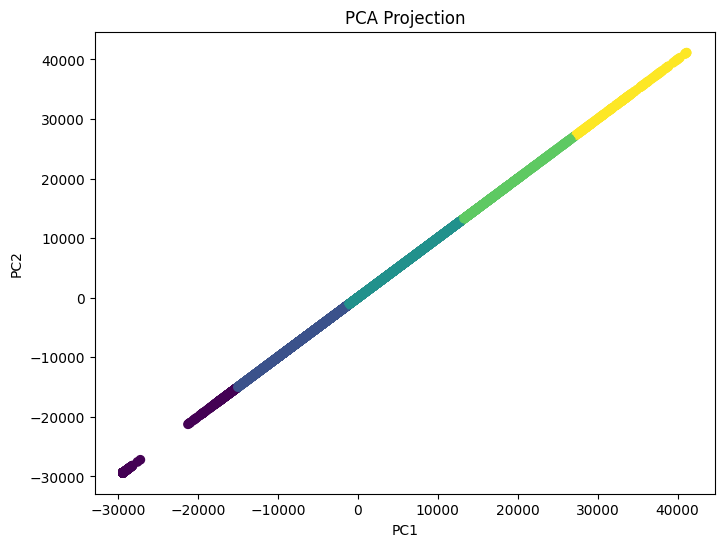

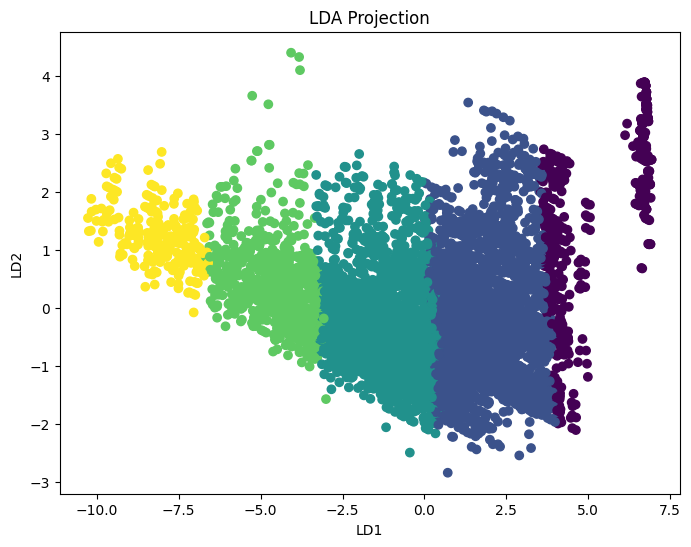

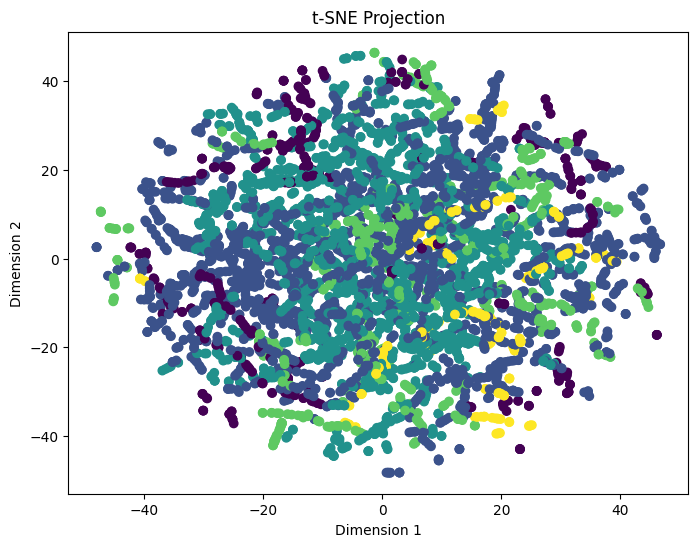

In [76]:
# pca, lda, tsne in 2d

# for PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 0], c=df['MSRP_bin'], cmap='viridis')
plt.title('PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# for LDA
plt.figure(figsize=(8, 6))
plt.scatter(df_lda[:, 0], df_lda[:, 1], c=df['MSRP_bin'], cmap='viridis')
plt.title('LDA Projection')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

# for t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df['MSRP_bin'], cmap='viridis')
plt.title('t-SNE Projection')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


- PCA is for data where we have to reduce dimensionality while preserving the variance, which is determined by the principal components. It reduces dimensionality while preserving class variance.
- t-SNE is suitable for data where we have to preserve class separability but is computationally expensive, preserves local structures well but not global structures, not is not suitable for this dataset.
- LDA is suitable for data where we have to maximize class separability, the target variable is categorical, and the predictor variables are normally distriburted within each class. It is more relevant to this dataset due to MSRP_bin target variable and linear seperability of the target classes. We have also used pd.cut instead of pd.qcut as it creates classses based on raw values instead of percentile.
- Observering the visualization plots, PCA and LDA have better representations compared to t-SNE. And LDA performs better than PCA, and t-SNE in both 2d and 3d space. Hence, LDA is chosen for dimensionality reduction.

# 3.Model Implementation [1]
a. Split the data into training and testing sets (80-20)

b. Implement a Random Forest model:

  - i. Train the model on the training set.

  - ii. Evaluate the model's performance on the testing set using appropriate metrics (e.g., R2 score, RMSE, etc.).

c. Implement an Adaboost model:

  - i. Train the model on the training set.

  - ii. Evaluate the model's performance on the testing set using the same metrics.


In [78]:
# random forest model using lda df

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df_lda, df['MSRP_bin'], test_size=0.2, random_state=42) # splitting the dataset into 80:20 (train:test)

# train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# test
y_pred = rf_model.predict(X_test)
r2_score_rf = r2_score(y_test, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))

# performance
print("Random Forest Model:")
print("- R2 Score:", r2_score_rf)
print("- RMSE:", rmse_rf)

Random Forest Model:
- R2 Score: 0.9836836221601664
- RMSE: 0.11466350109841143


In [79]:
# adaboost model using lda df

# train
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# test
y_pred_ada = ada_model.predict(X_test)
r2_score_ada = r2_score(y_test, y_pred_ada)
rmse_ada = np.sqrt(mean_squared_error(y_test, y_pred_ada))

#performance
print("Adaboost Model:")
print("- R2 Score:", r2_score_ada)
print("- RMSE:", rmse_ada)

Adaboost Model:
- R2 Score: 0.7245411505863385
- RMSE: 0.47113100494509197


# 4. Model Comparison and Analysis [1]
a. Compare the performance of the Random Forest and Adaboost models.

b. Discuss which model performed better and why, visualizing the feature importances for both models.

In [80]:
# compare the performance of random forest and adaboost models
models = [
    {
        "model": "Random Forest",
        "r2_score": r2_score_rf,
        "rmse": rmse_rf,
    },
    {
        "model": "Adaboost",
        "r2_score": r2_score_ada,
        "rmse": rmse_ada,
    },
]

df_models = pd.DataFrame(models)
print(df_models.to_string())

           model  r2_score      rmse
0  Random Forest  0.983684  0.114664
1       Adaboost  0.724541  0.471131


- Random forest model explains 98.37% of the variance in the data, which is a good fit, and the low RMSE shows that the predictions are very close to the actual values.
- Adaboost model explains 72.45% of the variance in the data, which is good but lower than Random forest model, and it has a higher RMSE value compared to Random Forest model.
- Random forest is better performing.

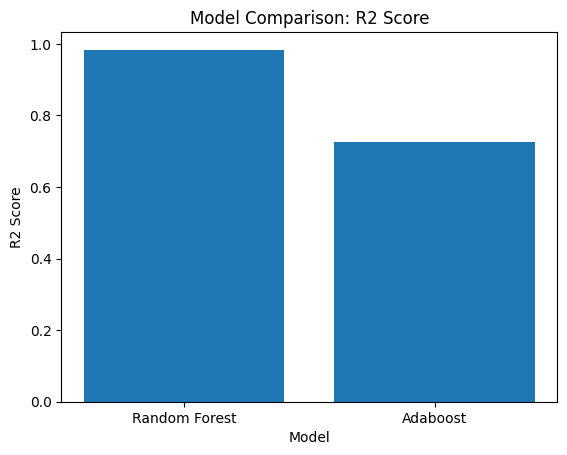

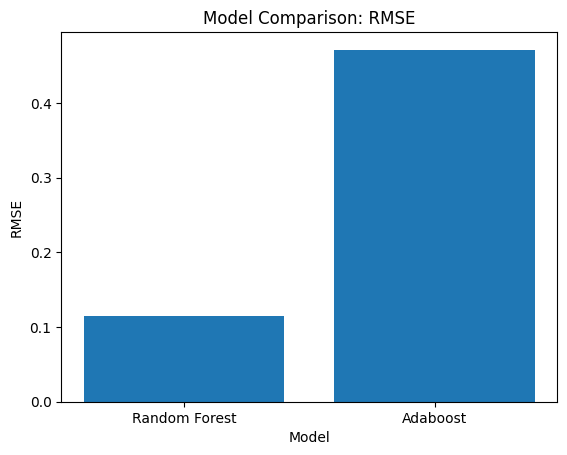

In [81]:
# visualize the performance difference

import matplotlib.pyplot as plt
models = ['Random Forest', 'Adaboost']
r2_scores = [r2_score_rf, r2_score_ada]

plt.bar(models, r2_scores)
plt.title('Model Comparison: R2 Score')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()

models = ['Random Forest', 'Adaboost']
rmse_scores = [rmse_rf, rmse_ada]

plt.bar(models, rmse_scores)
plt.title('Model Comparison: RMSE')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

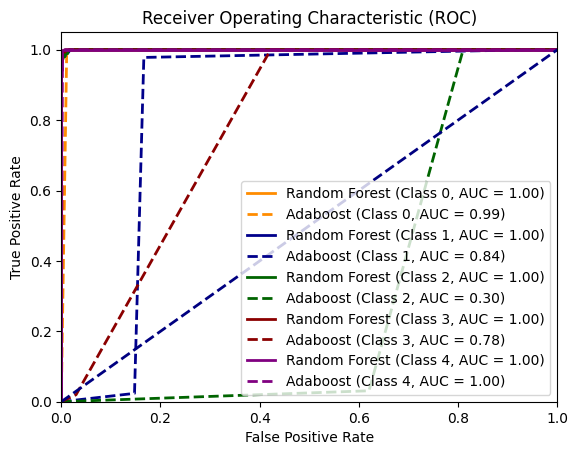

In [82]:
# comparing ROC and AUC for each class in both models
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

rf_probs = rf_model.predict_proba(X_test)

ada_probs = ada_model.predict_proba(X_test)

fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], rf_probs[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

fpr_ada = dict()
tpr_ada = dict()
roc_auc_ada = dict()
for i in range(n_classes):
    fpr_ada[i], tpr_ada[i], _ = roc_curve(y_test_bin[:, i], ada_probs[:, i])
    roc_auc_ada[i] = auc(fpr_ada[i], tpr_ada[i])

plt.figure()
lw = 2
colors = ['darkorange', 'darkblue', 'darkgreen', 'darkred', 'purple']
for i in range(n_classes):
    plt.plot(fpr_rf[i], tpr_rf[i], color=colors[i],
             lw=lw, label='Random Forest (Class {0}, AUC = {1:0.2f})'.format(i, roc_auc_rf[i]))
    plt.plot(fpr_ada[i], tpr_ada[i], color=colors[i], linestyle='--',
             lw=lw, label='Adaboost (Class {0}, AUC = {1:0.2f})'.format(i, roc_auc_ada[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

- Random forest is performing really well for all classes with an AUC value of 1.00, which is an ideal case.
- Whereas, adaboost is performing well for most classes except class 2 with a low AUC value of 0.30

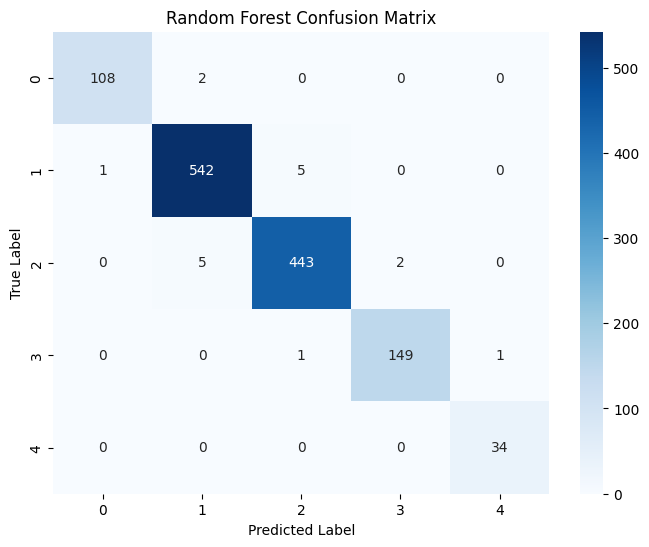

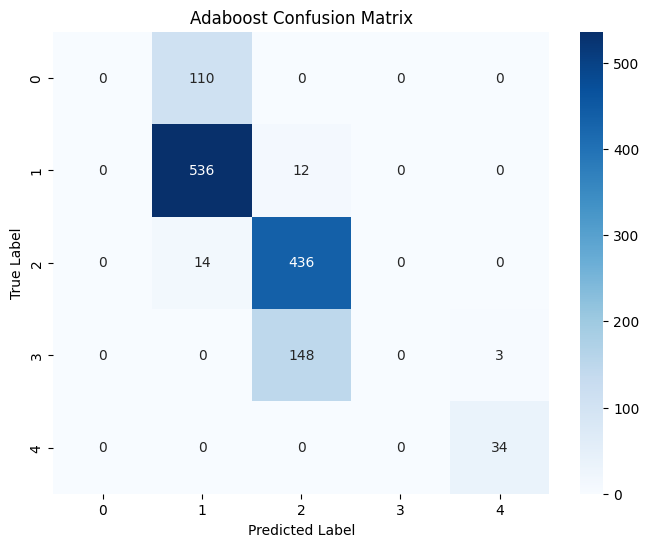

In [83]:
# confusion matrix for both models

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_rf = rf_model.predict(X_test)
y_pred_ada = ada_model.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_ada = confusion_matrix(y_test, y_pred_ada)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Blues")
plt.title("Adaboost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

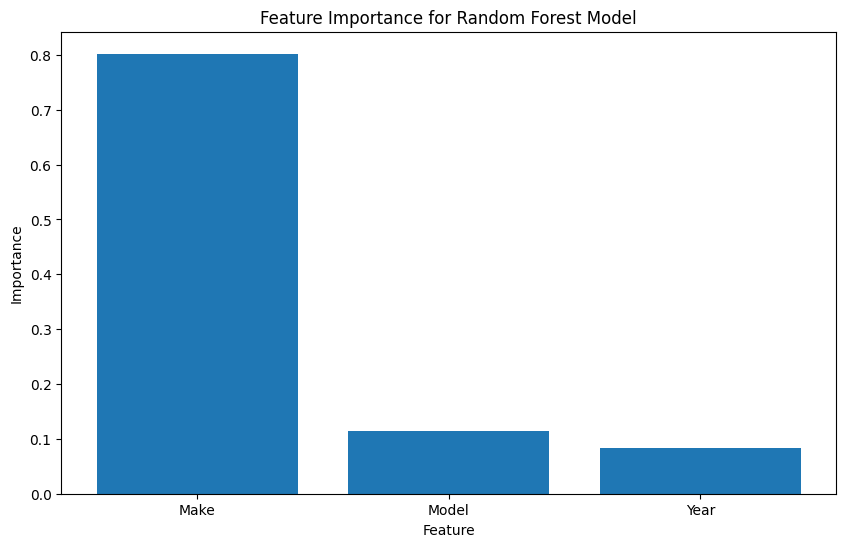

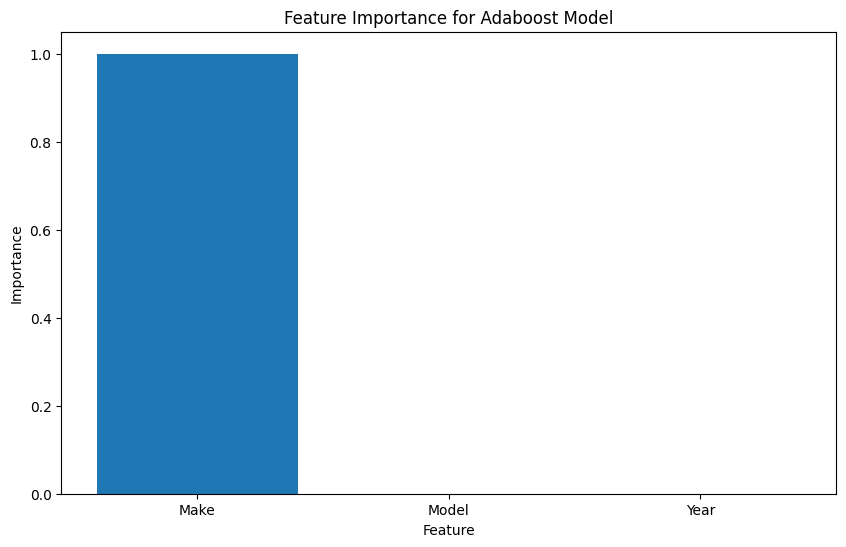

In [89]:
# comparing feature importances randomforest model
import matplotlib.pyplot as plt
importances_rf = rf_model.feature_importances_

features_sorted_rf = sorted(zip(df.columns, importances_rf), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
plt.bar(x=[x[0] for x in features_sorted_rf], height=[x[1] for x in features_sorted_rf])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance for Random Forest Model")
plt.show()

# comparing feature importances adaboost model
importances_ada = ada_model.feature_importances_

features_sorted_ada = sorted(zip(df.columns, importances_ada), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
plt.bar(x=[x[0] for x in features_sorted_ada], height=[x[1] for x in features_sorted_ada])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance for Adaboost Model")
plt.show()

- The random forest model is prioritizing features make, model, year, whereas the adaboost model considers only make.
- This affects the model performance as it can be observed that random forest has an higher accuracy due to better feature importance selection.

# 5. Hyperparameter Tuning [1]
a. Perform hyperparameter tuning for both Random Forest and Adaboost models using techniques such as Grid Search or Random Search.

b. Employ cross-validation to ensure robustness and avoid overfitting during the tuning process.

c. Report the best parameters and the corresponding model performance improvements.

In [90]:
# hyper parameter tuning for random forest using grid search

import numpy as np
from sklearn.model_selection import GridSearchCV

# grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 5-fold cross validation to avoid overfitting
grid_search = GridSearchCV(rf_model, param_grid, cv=5)

# fit
grid_search.fit(X_train, y_train)

# get best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# evaluate the best model
y_pred_best = best_model.predict(X_test)
r2_score_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print("Best Parameters:", best_params)
print("Best Model R2 Score:", r2_score_best)
print("Best Model RMSE:", rmse_best)

# compare the performance of the best model with the original random forest model
print("Original Model R2 Score:", r2_score_rf)
print("Original Model RMSE:", rmse_rf)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Model R2 Score: 0.9788846875013918
Best Model RMSE: 0.1304403868013816
Original Model R2 Score: 0.9836836221601664
Original Model RMSE: 0.11466350109841143


- the original model has a performed better than the best tuned model for random forest
- the dataset does not seem to benefit from the tuning adjustments.
- the r2 score is approx. 0.49% lower and the rmse score is approx. 13.75% higher than the original model

In [91]:
# show the hyperparameter combinations

import pandas as pd
cv_results = pd.DataFrame(grid_search.cv_results_)

print(cv_results)


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.019393      0.242949         0.029667        0.000701   
1        1.114206      0.081420         0.045898        0.005734   
2        1.837407      0.330109         0.082387        0.029728   
3        0.541488      0.048821         0.021608        0.003530   
4        1.525004      0.254158         0.050118        0.006897   
..            ...           ...              ...             ...   
76       1.152627      0.220004         0.045873        0.005486   
77       1.433853      0.042089         0.055222        0.000694   
78       0.467396      0.006350         0.021516        0.002071   
79       1.145139      0.204264         0.041982        0.003537   
80       1.413493      0.007175         0.059339        0.007462   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
0             None                      1                       2   
1             None                      1    

In [92]:
# hyper parameter tuning for adaboost model

# grid of hyperparameters to search
param_grid_ada = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.5, 1]
}

grid_search_ada = GridSearchCV(ada_model, param_grid_ada, cv=5) # 5-fold cross validation to avoid overfitting

# fit
grid_search_ada.fit(X_train, y_train)

# get the best hyperparameters and best model
best_params_ada = grid_search_ada.best_params_
best_model_ada = grid_search_ada.best_estimator_

# evaluate the best model
y_pred_best_ada = best_model_ada.predict(X_test)
r2_score_best_ada = r2_score(y_test, y_pred_best_ada)
rmse_best_ada = np.sqrt(mean_squared_error(y_test, y_pred_best_ada))

print("Best Parameters for Adaboost:", best_params_ada)
print("Best Model R2 Score for Adaboost:", r2_score_best_ada)
print("Best Model RMSE for Adaboost:", rmse_best_ada)

# Compare the performance of the best model with the original adaboost model
print("Original Model R2 Score for Adaboost:", r2_score_ada)
print("Original Model RMSE for Adaboost:", rmse_ada)

Best Parameters for Adaboost: {'learning_rate': 0.1, 'n_estimators': 200}
Best Model R2 Score for Adaboost: 0.8329970738746443
Best Model RMSE for Adaboost: 0.366838882428312
Original Model R2 Score for Adaboost: 0.7245411505863385
Original Model RMSE for Adaboost: 0.47113100494509197


- the new tuned model has a higher performance compared to the original model.
- the r2 score is approx. 14.97% higher and rmse score is approx. 22.14% lower.
- the hyperparameter tuning is improving the performance of the AdaBoost model.

In [93]:
# show the hyperparameter tuning for adaboost

import pandas as pd
cv_results_ada = pd.DataFrame(grid_search_ada.cv_results_)

print(cv_results_ada)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.633603      0.123222         0.038137        0.007867   
1       0.978730      0.006931         0.063358        0.001579   
2       1.674838      0.243302         0.102006        0.015471   
3       0.487112      0.004733         0.032004        0.001871   
4       0.978614      0.007863         0.060512        0.000798   
5       1.636986      0.255034         0.104583        0.025836   
6       0.478385      0.012816         0.031060        0.001186   
7       1.142016      0.194890         0.074074        0.016288   
8       1.471669      0.027419         0.092844        0.002707   

  param_learning_rate param_n_estimators  \
0                 0.1                100   
1                 0.1                200   
2                 0.1                300   
3                 0.5                100   
4                 0.5                200   
5                 0.5                300   
6                   1

In [95]:
# performance of best version of both models

from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred_best = best_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_best)
precision_rf = precision_score(y_test, y_pred_best, average='weighted')
recall_rf = recall_score(y_test, y_pred_best, average='weighted')

print("Random Forest Model:")
print("- Accuracy:", accuracy_rf)
print("- Precision:", precision_rf)
print("- Recall:", recall_rf)

y_pred_best_ada = best_model_ada.predict(X_test)

accuracy_ada = accuracy_score(y_test, y_pred_best_ada)
precision_ada = precision_score(y_test, y_pred_best_ada, average='weighted')
recall_ada = recall_score(y_test, y_pred_best_ada, average='weighted')

print("Adaboost Model:")
print("- Accuracy:", accuracy_ada)
print("- Precision:", precision_ada)
print("- Recall:", recall_ada)

Random Forest Model:
- Accuracy: 0.982985305491106
- Precision: 0.9830351492442222
- Recall: 0.982985305491106
Adaboost Model:
- Accuracy: 0.8654292343387471
- Precision: 0.7750677825380194
- Recall: 0.8654292343387471


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


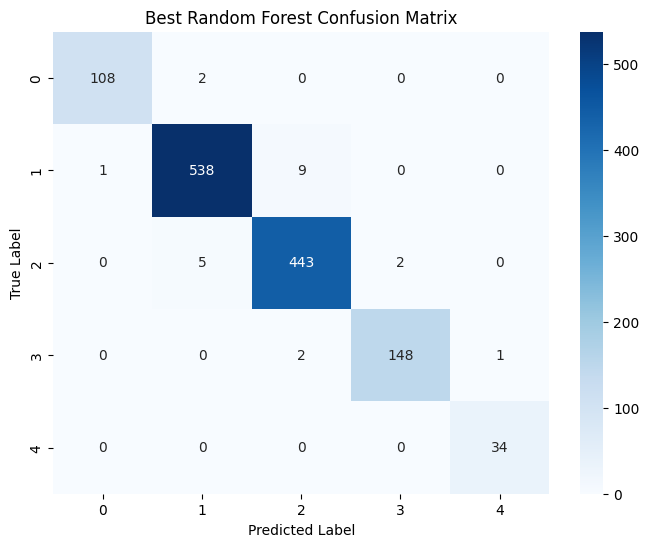

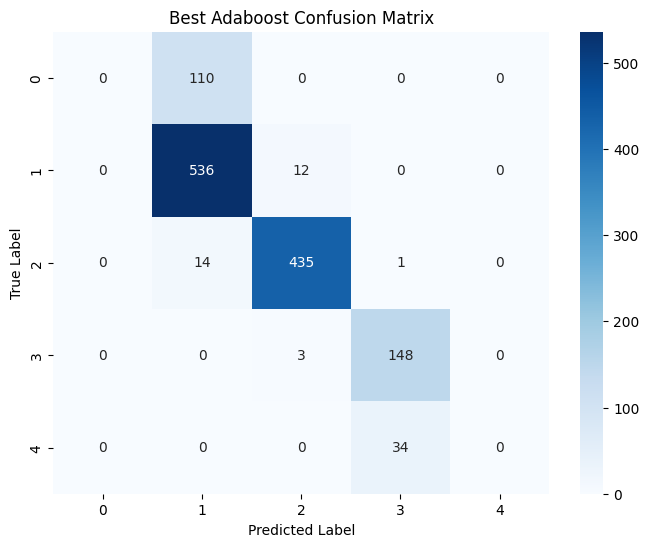

In [96]:
# confusion matrix for the best models

import matplotlib.pyplot as plt
y_pred_best_rf = best_model.predict(X_test)
y_pred_best_ada = best_model_ada.predict(X_test)

cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
cm_best_ada = confusion_matrix(y_test, y_pred_best_ada)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Best Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_ada, annot=True, fmt="d", cmap="Blues")
plt.title("Best Adaboost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#6. Model Interpretation [0.5]
a. Visualize the feature importances using bar plots and discuss their impact on model predictions.

b. Conduct an error analysis to identify where model predictions diverge significantly from actual values and discuss possible reasons based on the feature importances and other relevant factors.

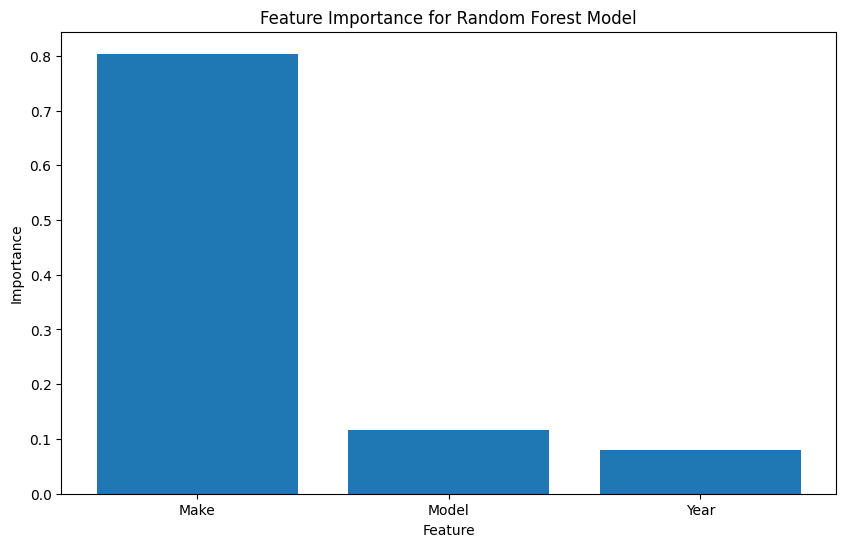

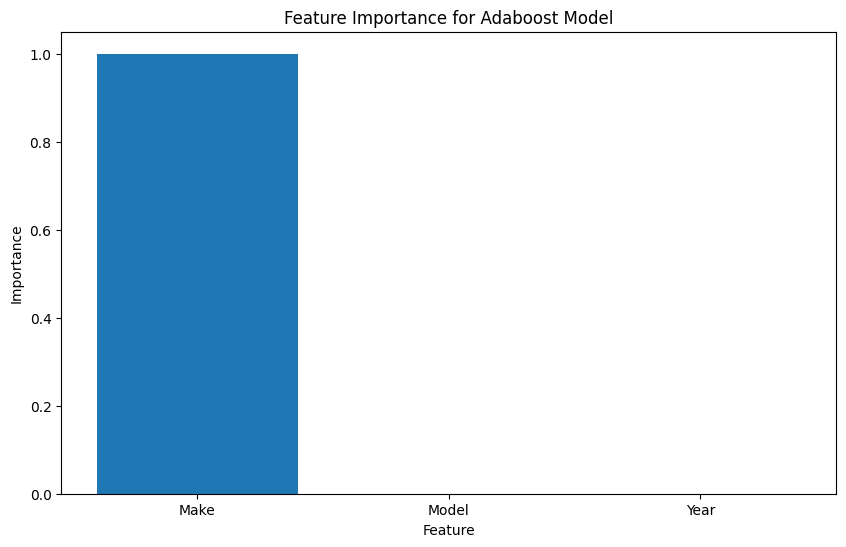

In [97]:
# visualize the feature importance

import matplotlib.pyplot as plt

# for the best random forest model
importances_rf = best_model.feature_importances_

features_sorted_rf = sorted(zip(df.columns, importances_rf), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
plt.bar(x=[x[0] for x in features_sorted_rf], height=[x[1] for x in features_sorted_rf])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance for Random Forest Model")
plt.show()

# for the best Adaboost model
importances_ada = best_model_ada.feature_importances_

features_sorted_ada = sorted(zip(df.columns, importances_ada), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
plt.bar(x=[x[0] for x in features_sorted_ada], height=[x[1] for x in features_sorted_ada])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance for Adaboost Model")
plt.show()


- the best random forest model is prioritizing features make, model, year, whereas the best adaboost model considers only make.
- this affects the model performance as it can be observed that random forest has an higher accuracy due to better feature importance selection.

In [100]:
# indices of misclassified samples for both models
misclassified_rf = np.where(y_test != y_pred_best)[0]
misclassified_ada = np.where(y_test != y_pred_best_ada)[0]

# rows of the misclassified samples from the original dataset
misclassified_rows_rf = df.iloc[misclassified_rf]
misclassified_rows_ada = df.iloc[misclassified_ada]

print("Misclassified rows for Random Forest:")
misclassified_rows_rf

Misclassified rows for Random Forest:


,Make,Model,Year,Engine Fuel Type,Engine HP,Transmission Type,MSRP,Engine Cylinders,MSRP_bin
50,2,3,2017,2,0.628713,1,46450,2,3
267,17,10,2007,4,0.556931,2,35550,2,2
279,17,10,2008,4,0.556931,2,36280,2,2
280,17,10,2008,4,0.556931,2,36740,2,2
412,2,13,2015,3,0.393564,1,40300,0,2
453,2,12,2017,2,0.591584,1,48500,2,3
489,21,14,2015,4,0.467822,1,36115,2,2
719,14,18,2017,4,0.254950,1,25245,0,1
1023,1,23,2015,2,0.344059,0,47050,0,3
1075,1,24,2016,3,0.344059,1,38000,0,2


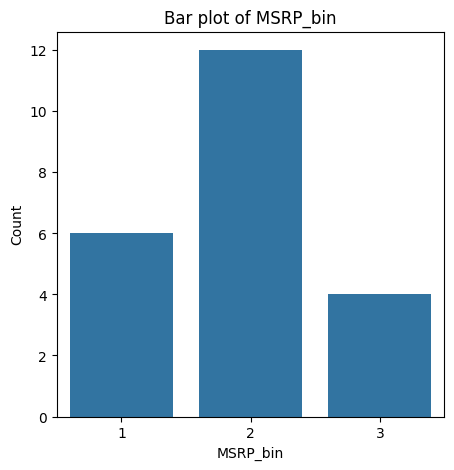

In [104]:
#count of classes misclassified by random forest best model
plt.figure(figsize=(5, 5))
sns.barplot(x = misclassified_rows_rf['MSRP_bin'].value_counts().index, y = misclassified_rows_rf['MSRP_bin'].value_counts().values)
plt.xlabel('MSRP_bin')
plt.ylabel('Count')
plt.title('Bar plot of MSRP_bin')
plt.show()


In [101]:
print("Misclassified rows for Adaboost:")
misclassified_rows_ada

Misclassified rows for Adaboost:


,Make,Model,Year,Engine Fuel Type,Engine HP,Transmission Type,MSRP,Engine Cylinders,MSRP_bin
8,2,0,2012,3,0.368812,2,36900,2,2
23,1,1,1993,4,0.225248,1,2000,2,0
28,1,1,1994,4,0.225248,2,2000,2,0
50,2,3,2017,2,0.628713,1,46450,2,3
53,2,3,2017,2,0.628713,1,44450,2,3
...,...,...,...,...,...,...,...,...,...
2405,22,50,2016,2,0.294554,2,34655,0,2
2411,22,50,2016,2,0.294554,0,34475,0,2
2427,21,69,2003,4,0.146040,1,18140,0,1
2428,21,69,2003,3,0.245050,2,22005,0,1


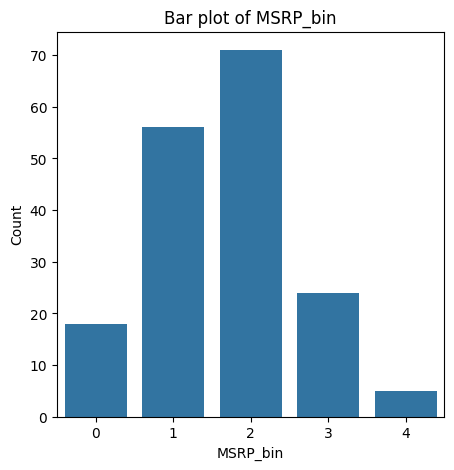

In [105]:
#count of classes misclassified by adaboost best model
plt.figure(figsize=(5, 5))
sns.barplot(x = misclassified_rows_ada['MSRP_bin'].value_counts().index, y = misclassified_rows_ada['MSRP_bin'].value_counts().values)
plt.xlabel('MSRP_bin')
plt.ylabel('Count')
plt.title('Bar plot of MSRP_bin')
plt.show()

In [124]:
total_count = {0:0, 1:0, 2:0, 3:0, 4:0}
misclassified_counts = {0:0, 1:0, 2:0, 3:0, 4:0}
for i in range(5):
  total_count[i] = len(df[df['MSRP_bin'] == i])
  misclassified_counts[i] = len(misclassified_rows_rf[misclassified_rows_rf['MSRP_bin'] == i])

# calculate the percentage of misclassified instances for each class
misclassified_percentages = {0:0, 1:0, 2:0, 3:0, 4:0}
for i in range(5):
  misclassified_percentages[i] = (misclassified_counts[i] / total_count[i]) * 100

print(misclassified_counts, total_count)
print(misclassified_percentages)

{0: 0, 1: 6, 2: 12, 3: 4, 4: 0} {0: 517, 1: 2785, 2: 2177, 3: 750, 4: 234}
{0: 0.0, 1: 0.21543985637342908, 2: 0.5512172714745062, 3: 0.5333333333333333, 4: 0.0}


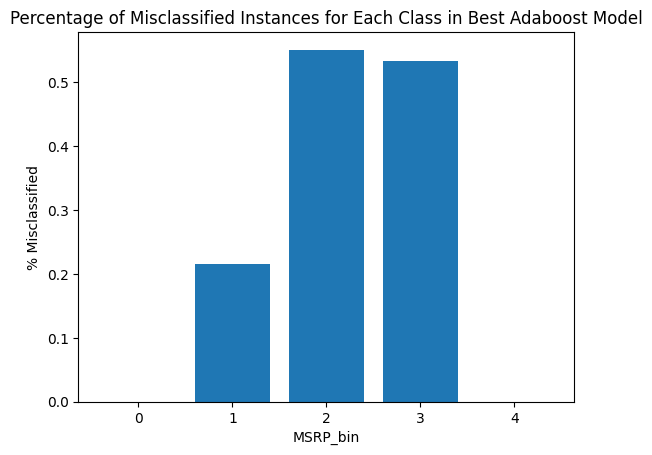

In [125]:
#plot
plt.bar(range(len(misclassified_percentages)), list(misclassified_percentages.values()), tick_label=list(misclassified_percentages.keys()))

plt.xlabel("MSRP_bin")
plt.ylabel("% Misclassified")
plt.title("Percentage of Misclassified Instances for Each Class in Best Random forest Model")

plt.show()


- class 0 has 517 data points, class 4 has 234 data points. these are much lower than other classes with high data points of 2785, 2177, 750
- random forest is able to better handle classes with lower data points than the ones with more data points.
- this maybe due to higher variances in classes with more data points.

In [121]:
total_count = {0:0, 1:0, 2:0, 3:0, 4:0}
misclassified_counts = {0:0, 1:0, 2:0, 3:0, 4:0}
for i in range(5):
  total_count[i] = len(df[df['MSRP_bin'] == i])
  misclassified_counts[i] = len(misclassified_rows_ada[misclassified_rows_ada['MSRP_bin'] == i])

# calculate the percentage of misclassified instances for each class
misclassified_percentages = {0:0, 1:0, 2:0, 3:0, 4:0}
for i in range(5):
  misclassified_percentages[i] = (misclassified_counts[i] / total_count[i]) * 100

print(misclassified_counts, total_count)
print(misclassified_percentages)

{0: 18, 1: 56, 2: 71, 3: 24, 4: 5} {0: 517, 1: 2785, 2: 2177, 3: 750, 4: 234}
{0: 3.481624758220503, 1: 2.0107719928186714, 2: 3.261368856224162, 3: 3.2, 4: 2.1367521367521367}


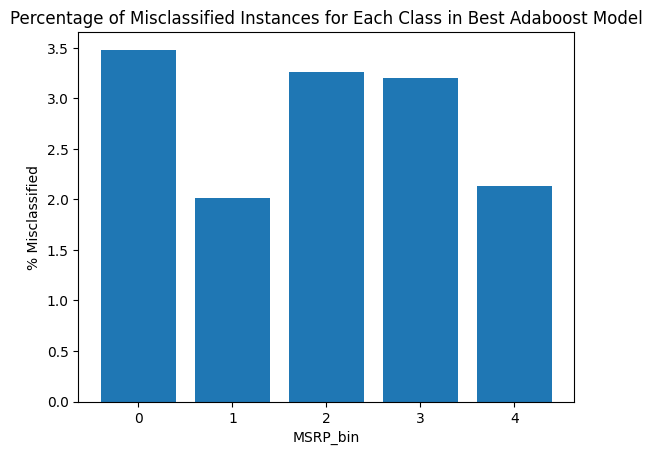

In [123]:
# plot
plt.bar(range(len(misclassified_percentages)), list(misclassified_percentages.values()), tick_label=list(misclassified_percentages.keys()))

plt.xlabel("MSRP_bin")
plt.ylabel("% Misclassified")
plt.title("Percentage of Misclassified Instances for Each Class in Best Adaboost Model")

plt.show()

- adaboost model has almost evenly misclassified in all classes.
- it treats classes with low and high data points similarly and hence is not able to better fit the data points evenly throughout all the classes.

In [132]:
misclassified_rows_ada.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Transmission Type', 'MSRP', 'Engine Cylinders', 'MSRP_bin'],
      dtype='object')

In [137]:
# error analysis

print("Random Forest Model:")
for i in range(5):
  print("Class", i)
  print(misclassified_rows_rf[misclassified_rows_rf['MSRP_bin'] == i][['Make', 'Model', 'Year', 'MSRP_bin']])
  print(misclassified_rows_rf[misclassified_rows_rf['MSRP_bin'] == i][['Make', 'Model', 'Year', 'MSRP_bin']].describe())

Random Forest Model:
Class 0
Empty DataFrame
Columns: [Make, Model, Year, MSRP_bin]
Index: []
       Make  Model  Year  MSRP_bin
count   0.0    0.0   0.0       0.0
mean    NaN    NaN  <NA>       NaN
std     NaN    NaN  <NA>       NaN
min     NaN    NaN  <NA>       NaN
25%     NaN    NaN  <NA>       NaN
50%     NaN    NaN  <NA>       NaN
75%     NaN    NaN  <NA>       NaN
max     NaN    NaN  <NA>       NaN
Class 1
      Make  Model  Year  MSRP_bin
719     14     18  2017         1
1285     9     30  2017         1
2053    19     43  2016         1
2132    22     61  2001         1
2361     5     68  2004         1
2366     5     68  2005         1
            Make      Model     Year  MSRP_bin
count   6.000000   6.000000      6.0       6.0
mean   12.333333  48.000000   2010.0       1.0
std     7.201852  21.061814  7.42967       0.0
min     5.000000  18.000000   2001.0       1.0
25%     6.000000  33.250000  2004.25       1.0
50%    11.500000  52.000000   2010.5       1.0
75%    17.750000

For Random Forest Best Model:
- In class 0 - there is no misclassification
- In class 1 - for 'Make' in the range of 5 to 22, 'Model' in the range of 18 to 68, 'Year' in the range of 2007 to 2017 there is misclassification.
- In class 2 - for 'Make' in the range of 1 to 22, 'Model' in the range of 10 to 64,'Year' in the range of 2007 to 2017, there is misclassification
- In class 3 - Make in the range of 1 to 4,'Model' in the range of 3 to 27,'Year' in the range of 2015 to 2017, there is misclassification.
- In class 4 - there is no misclassification

In [140]:
print("Adaboost Model:")
for i in range(5):
  print("Class", i)
  print(misclassified_rows_ada[misclassified_rows_ada['MSRP_bin'] == i][['Make', 'MSRP_bin']].describe())

Adaboost Model:
Class 0
            Make  MSRP_bin
count  18.000000      18.0
mean   11.166667       0.0
std     6.997899       0.0
min     1.000000       0.0
25%     5.000000       0.0
50%    12.000000       0.0
75%    15.000000       0.0
max    23.000000       0.0
Class 1
            Make  MSRP_bin
count  56.000000      56.0
mean   14.660714       1.0
std     6.408167       0.0
min     5.000000       1.0
25%     8.000000       1.0
50%    14.000000       1.0
75%    21.000000       1.0
max    22.000000       1.0
Class 2
            Make  MSRP_bin
count  71.000000      71.0
mean   11.774648       2.0
std     7.858021       0.0
min     1.000000       2.0
25%     4.000000       2.0
50%     9.000000       2.0
75%    21.000000       2.0
max    22.000000       2.0
Class 3
            Make  MSRP_bin
count  24.000000      24.0
mean    5.625000       3.0
std     6.084996       0.0
min     1.000000       3.0
25%     2.000000       3.0
50%     3.000000       3.0
75%     5.000000       3.0
max    

For Random Forest Best Model:
- In class 0 - for 'Make' in the range of 1 to 23 there is misclassification
- In class 1 - for 'Make' in the range of 5 to 22 there is misclassification
- In class 2 - for 'Make' in the range of 1 to 22 there is misclassification
- In class 3 - for 'Make' in the range of 1 to 17 there is misclassification
- In class 4 - for 'Make' in the range of 1 to 15 there is misclassification

- Both models are affected by feature 'Make' in the range of 5 to 22 for class 1 and 1 to 22 for class 2.
- Random forest is better performing for all classes.
- Hence, having multiple important features like Make, Model, Year has resulted in better performance of the tuned best Random forest Model.